The Greenhouse Gas (GHG) Inventory Data contains the most recently submitted information, covering the period from 1990 to the latest available year, to the extent the data have been provided. The GHG data contain information on anthropogenic emissions by sources and removals by sinks of the following GHGs (carbon dioxide (CO2), methane (CH4), nitrous oxide (N2O), hydrofluorocarbons (HFCs), perfluorocarbons (PFCs), unspecified mix of HFCs and PFCs, sulphur hexafluoride (SF6) and nitrogen triflouride (NF3)) that are not controlled by the Montreal Protocol. 


In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/Aya Zaoui/Downloads/greenhouse_gas_inventory_data_data.csv")
df.head()

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


In [3]:
df = df.pivot_table(values='value', index=['country_or_area','year'], columns='category').reset_index()

In [4]:
def get_cname(c):
    try:
        if c == 'greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent':
            return 'greenhouse_gas_including_co2'
        
        elif c == 'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent':
            return 'unspecified_mix_of_hfcs_pfcs'
        
        elif c == 'country_or_area':
            return 'country'
        
        
        first = c.split('_')[0] + '_' + c.split('_')[1]
        return first
    except:
        return c

df = df.rename(columns = {k: get_cname(k) for k in df.columns})

In [5]:
df.isnull().sum()

category
country                           0
year                              0
carbon_dioxide                    0
greenhouse_gas_including_co2    125
greenhouse_gas                    0
hydrofluorocarbons_hfcs          99
methane_ch4                       0
nitrogen_trifluoride            826
nitrous_oxide                     0
perfluorocarbons_pfcs           243
sulphur_hexafluoride             42
unspecified_mix_of_hfcs_pfcs    999
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1074 non-null   object 
 1   year                          1074 non-null   int64  
 2   carbon_dioxide                1074 non-null   float64
 3   greenhouse_gas_including_co2  949 non-null    float64
 4   greenhouse_gas                1074 non-null   float64
 5   hydrofluorocarbons_hfcs       975 non-null    float64
 6   methane_ch4                   1074 non-null   float64
 7   nitrogen_trifluoride          248 non-null    float64
 8   nitrous_oxide                 1074 non-null   float64
 9   perfluorocarbons_pfcs         831 non-null    float64
 10  sulphur_hexafluoride          1032 non-null   float64
 11  unspecified_mix_of_hfcs_pfcs  75 non-null     float64
dtypes: float64(10), int64(1), object(1)
memory usage: 100.8+ KB


In [7]:
df.isnull().sum()

category
country                           0
year                              0
carbon_dioxide                    0
greenhouse_gas_including_co2    125
greenhouse_gas                    0
hydrofluorocarbons_hfcs          99
methane_ch4                       0
nitrogen_trifluoride            826
nitrous_oxide                     0
perfluorocarbons_pfcs           243
sulphur_hexafluoride             42
unspecified_mix_of_hfcs_pfcs    999
dtype: int64

In [8]:
df['hydrofluorocarbons_hfcs'] = df['hydrofluorocarbons_hfcs'].fillna(df['hydrofluorocarbons_hfcs'].mean())
df['nitrogen_trifluoride'] = df['nitrogen_trifluoride'].fillna(df['nitrogen_trifluoride'].mean())
df['sulphur_hexafluoride'] = df['sulphur_hexafluoride'].fillna(df['sulphur_hexafluoride'].mean())
df['perfluorocarbons_pfcs'] = df['perfluorocarbons_pfcs'].fillna(df['perfluorocarbons_pfcs'].mean())

df.head()

category,country,year,carbon_dioxide,greenhouse_gas_including_co2,greenhouse_gas,hydrofluorocarbons_hfcs,methane_ch4,nitrogen_trifluoride,nitrous_oxide,perfluorocarbons_pfcs,sulphur_hexafluoride,unspecified_mix_of_hfcs_pfcs
0,Australia,1990,278265.898941,418623.049563,418623.049563,1424.683520,118768.837813,113.467226,15345.597858,4607.012919,211.018511,NaN
1,Australia,1991,279741.639012,418674.057494,418674.057494,1424.683520,117744.641814,113.467226,14923.405021,4610.743294,228.944834,NaN
2,Australia,1992,284766.092718,423080.108191,423080.108191,1333.184000,116837.506726,113.467226,15293.183355,4603.282544,246.858849,NaN
3,Australia,1993,289142.267681,423764.932564,423764.932564,1829.872000,113837.511923,113.467226,15374.993428,3315.528376,264.759156,NaN
4,Australia,1994,293830.709141,424092.959373,424092.959373,1027.343549,110997.410185,113.467226,15790.426852,2164.428749,282.640896,NaN


In [9]:
df.drop(['unspecified_mix_of_hfcs_pfcs', 'greenhouse_gas_including_co2'], axis='columns', inplace=True)

In [10]:
df.head()

category,country,year,carbon_dioxide,greenhouse_gas,hydrofluorocarbons_hfcs,methane_ch4,nitrogen_trifluoride,nitrous_oxide,perfluorocarbons_pfcs,sulphur_hexafluoride
0,Australia,1990,278265.898941,418623.049563,1424.683520,118768.837813,113.467226,15345.597858,4607.012919,211.018511
1,Australia,1991,279741.639012,418674.057494,1424.683520,117744.641814,113.467226,14923.405021,4610.743294,228.944834
2,Australia,1992,284766.092718,423080.108191,1333.184000,116837.506726,113.467226,15293.183355,4603.282544,246.858849
3,Australia,1993,289142.267681,423764.932564,1829.872000,113837.511923,113.467226,15374.993428,3315.528376,264.759156
4,Australia,1994,293830.709141,424092.959373,1027.343549,110997.410185,113.467226,15790.426852,2164.428749,282.640896


In [11]:
df.isnull().sum()

category
country                    0
year                       0
carbon_dioxide             0
greenhouse_gas             0
hydrofluorocarbons_hfcs    0
methane_ch4                0
nitrogen_trifluoride       0
nitrous_oxide              0
perfluorocarbons_pfcs      0
sulphur_hexafluoride       0
dtype: int64

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder

<AxesSubplot:xlabel='category', ylabel='category'>

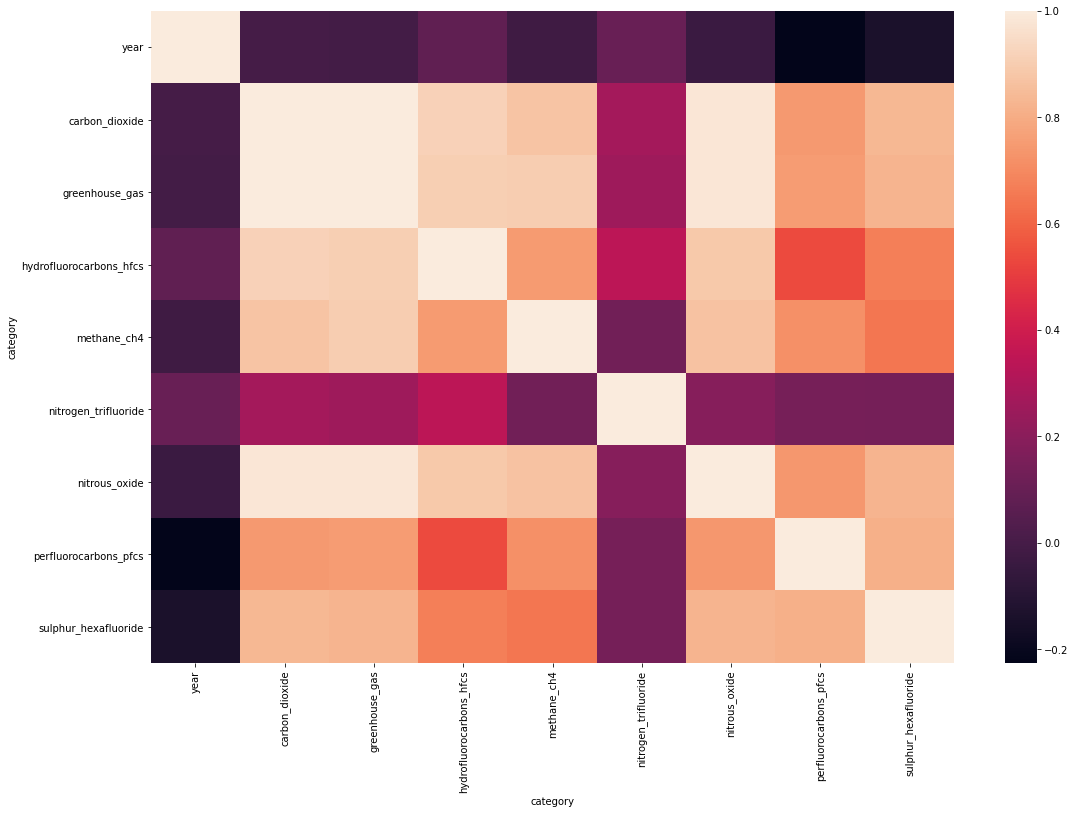

In [13]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr())

<AxesSubplot:xlabel='country', ylabel='greenhouse_gas'>

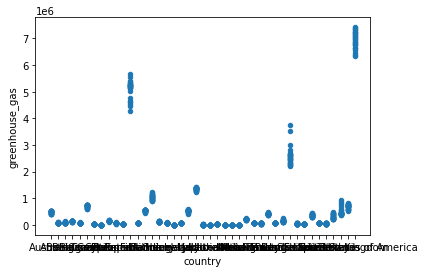

In [14]:
df.plot.scatter(x='country',y='greenhouse_gas')

In [15]:
df = pd.DataFrame(df, columns=['country', 'greenhouse_gas','year'])
df

,country,greenhouse_gas,year
0,Australia,4.186230e+05,1990
1,Australia,4.186741e+05,1991
2,Australia,4.230801e+05,1992
3,Australia,4.237649e+05,1993
4,Australia,4.240930e+05,1994
...,...,...,...
1069,United States of America,6.985457e+06,2010
1070,United States of America,6.865398e+06,2011
1071,United States of America,6.643011e+06,2012
1072,United States of America,6.799979e+06,2013


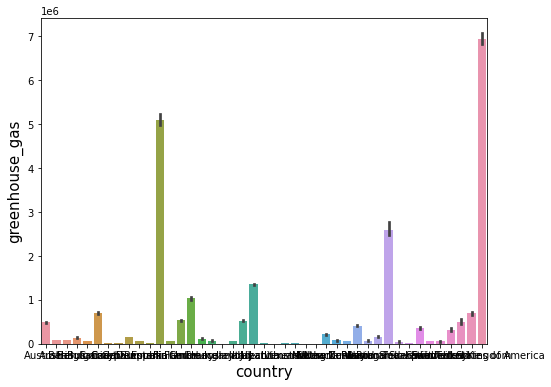

In [16]:
plt.figure(figsize=(8, 6))

plots = sns.barplot(x="country", y="greenhouse_gas", data=df)

plt.xlabel("country", size=15)
 

plt.ylabel("greenhouse_gas", size=15)

plt.show()

<AxesSubplot:xlabel='country'>

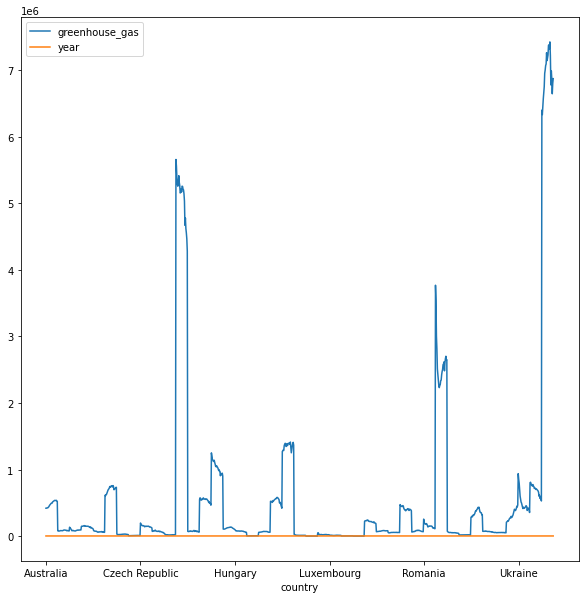

In [17]:
df = pd.DataFrame(df, columns=["greenhouse_gas", "country","year"])
 
# plot multiple columns such as population and year from dataframe
df.plot(x="country", y=["greenhouse_gas","year"],
        kind="line", figsize=(10, 10))


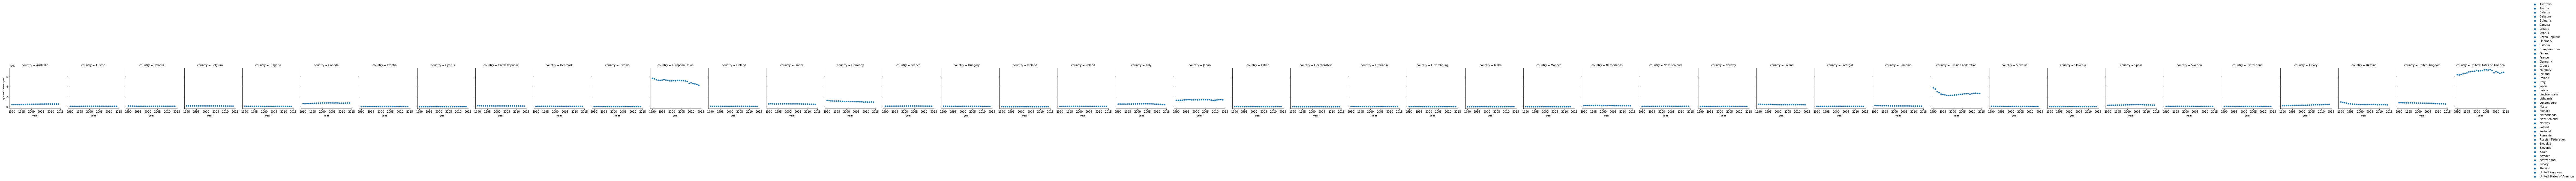

In [18]:
g = sns.FacetGrid(df,col='country')
g.map(sns.scatterplot, "year","greenhouse_gas","country")
g.add_legend()

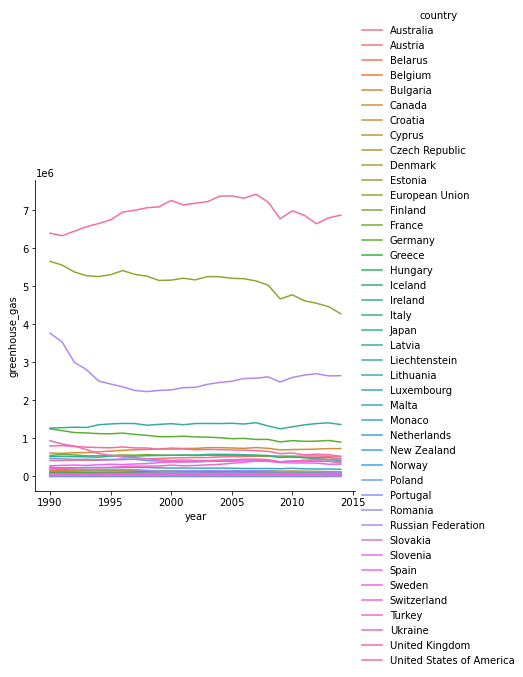

In [19]:

sns.relplot(
    data=df,
    x='year', y="greenhouse_gas",
    hue="country",
    kind="line", 
    height=5, aspect=1
)

In [20]:
df

,greenhouse_gas,country,year
0,4.186230e+05,Australia,1990
1,4.186741e+05,Australia,1991
2,4.230801e+05,Australia,1992
3,4.237649e+05,Australia,1993
4,4.240930e+05,Australia,1994
...,...,...,...
1069,6.985457e+06,United States of America,2010
1070,6.865398e+06,United States of America,2011
1071,6.643011e+06,United States of America,2012
1072,6.799979e+06,United States of America,2013


In [21]:
X=df.drop('greenhouse_gas',axis=1).values
Y=df['greenhouse_gas'].values
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=745832)

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
labelencoder=LabelEncoder()
df["country"]=labelencoder.fit_transform(df["country"])

In [25]:
df

,greenhouse_gas,country,year
0,4.186230e+05,0,1990
1,4.186741e+05,0,1991
2,4.230801e+05,0,1992
3,4.237649e+05,0,1993
4,4.240930e+05,0,1994
...,...,...,...
1069,6.985457e+06,42,2010
1070,6.865398e+06,42,2011
1071,6.643011e+06,42,2012
1072,6.799979e+06,42,2013


In [24]:
from sklearn.tree import DecisionTreeClassifier 
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

ValueError: could not convert string to float: 'Russian Federation'